In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.11.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/MyDrive/Dataset1/CNN_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

In [5]:
import os

path = "/content/Validation_data"
path1 = "/content/Validation_data/AbdomenCT"
path2 = "/content/Validation_data/ChestCT"
path3 = "/content/Validation_data/CXR"
path4 = "/content/Validation_data/Hand"
path5 = "/content/Validation_data/HeadCT"

os.mkdir(path)
os.mkdir(path1)
os.mkdir(path2)
os.mkdir(path3)
os.mkdir(path4)
os.mkdir(path5)

In [6]:
import os

path = "/content/test_data"
path1 = "/content/test_data/AbdomenCT"
path2 = "/content/test_data/ChestCT"
path3 = "/content/test_data/CXR"
path4 = "/content/test_data/Hand"
path5 = "/content/test_data/HeadCT"

os.mkdir(path)
os.mkdir(path1)
os.mkdir(path2)
os.mkdir(path3)
os.mkdir(path4)
os.mkdir(path5)

In [7]:
import shutil
x = 7000

for i in range(7001,8999):
  shutil.move("/content/CNN_dataset/AbdomenCT/00"+str(x)+".jpeg", "/content/Validation_data/AbdomenCT/00"+str(x)+".jpeg")
  x+=1
  
x = 7000

for i in range(7001,8999):
  shutil.move("/content/CNN_dataset/CXR/00"+str(x)+".jpeg", "/content/Validation_data/CXR/00"+str(x)+".jpeg")
  x+=1

x = 7000

for i in range(7001,8999):
  shutil.move("/content/CNN_dataset/ChestCT/00"+str(x)+".jpeg", "/content/Validation_data/ChestCT/00"+str(x)+".jpeg")
  x+=1

x = 7000

for i in range(7001,8999):
  shutil.move("/content/CNN_dataset/Hand/00"+str(x)+".jpeg", "/content/Validation_data/Hand/00"+str(x)+".jpeg")
  x+=1

x = 7000

for i in range(7001,8999):
  shutil.move("/content/CNN_dataset/HeadCT/00"+str(x)+".jpeg", "/content/Validation_data/HeadCT/00"+str(x)+".jpeg")
  x+=1

In [8]:
import shutil
x = 9000

for i in range(9000,9999):
  shutil.move("/content/CNN_dataset/AbdomenCT/00"+str(x)+".jpeg", "/content/test_data/AbdomenCT/00"+str(x)+".jpeg")
  x+=1
  
x = 9000

for i in range(9000,9999):
  shutil.move("/content/CNN_dataset/CXR/00"+str(x)+".jpeg", "/content/test_data/CXR/00"+str(x)+".jpeg")
  x+=1

x = 9000

for i in range(9000,9999):
  shutil.move("/content/CNN_dataset/ChestCT/00"+str(x)+".jpeg", "/content/test_data/ChestCT/00"+str(x)+".jpeg")
  x+=1

x = 9000

for i in range(9000,9999):
  shutil.move("/content/CNN_dataset/Hand/00"+str(x)+".jpeg", "/content/test_data/Hand/00"+str(x)+".jpeg")
  x+=1

x = 9000

for i in range(9000,9999):
  shutil.move("/content/CNN_dataset/HeadCT/00"+str(x)+".jpeg", "/content/test_data/HeadCT/00"+str(x)+".jpeg")
  x+=1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [10]:
train_dataset_path = '/content/CNN_dataset'
validation_dataset_path = '/content/Validation_data'

In [11]:
IMG_WIDTH = 32
IMG_HEIGHT = 32
BATCH_SIZE = 32

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 35015 images belonging to 5 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 9990 images belonging to 5 classes.


In [14]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : AbdomenCT
1 : CXR
2 : ChestCT
3 : Hand
4 : HeadCT


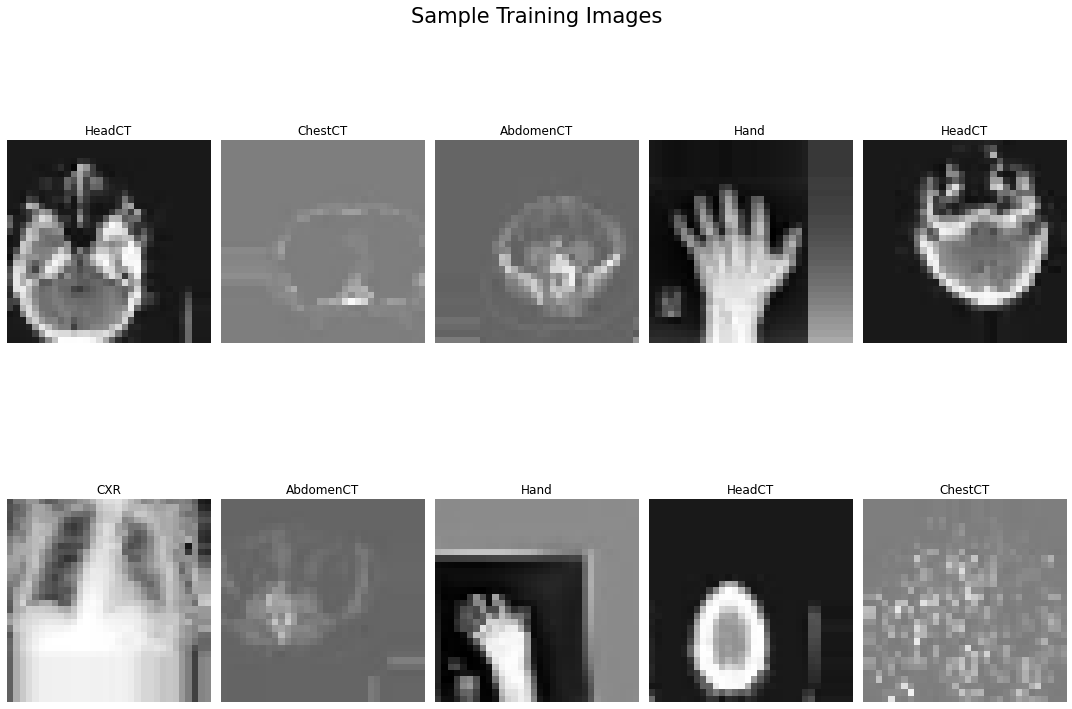

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [16]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=5, activation='softmax')
    ])
    
    return model

In [17]:
cnn_model = create_model()

In [18]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 activation (Activation)     (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 12, 12, 64)        0

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [20]:
optimizer = Adam(learning_rate=0.001)

In [21]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [27]:
history = cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/10
1095/1095 - 38s - loss: 0.0081 - accuracy: 0.9992 - val_loss: 0.0063 - val_accuracy: 0.9997 - lr: 3.1623e-04 - 38s/epoch - 35ms/step
Epoch 2/10
1095/1095 - 39s - loss: 0.0084 - accuracy: 0.9989 - val_loss: 0.0056 - val_accuracy: 0.9999 - lr: 3.1623e-04 - 39s/epoch - 36ms/step
Epoch 3/10
1095/1095 - 39s - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 1.0000 - lr: 3.1623e-04 - 39s/epoch - 35ms/step
Epoch 4/10
1095/1095 - 38s - loss: 0.0080 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9999 - lr: 3.1623e-04 - 38s/epoch - 35ms/step
Epoch 5/10
1095/1095 - 38s - loss: 0.0073 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 1.0000 - lr: 3.1623e-04 - 38s/epoch - 35ms/step
Epoch 6/10
1095/1095 - 38s - loss: 0.0113 - accuracy: 0.9985 - val_loss: 0.0055 - val_accuracy: 0.9997 - lr: 3.1623e-04 - 38s/epoch - 35ms/step
Epoch 7/10
1095/1095 - 38s - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 1.0000 - lr: 3.1623e-04 - 38s/epoch - 35

In [23]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

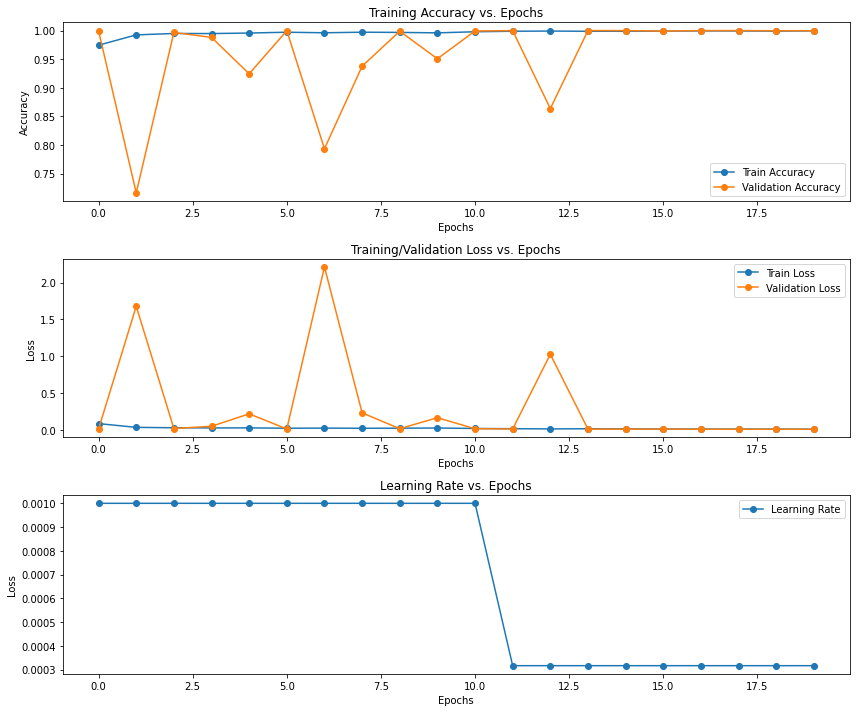

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [29]:
test_dataset = '/content/test_data/'

In [30]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 4995 images belonging to 5 classes.


In [31]:
predictions = cnn_model.predict(test_generator)

157/157 [==============================] - 2s 15ms/step


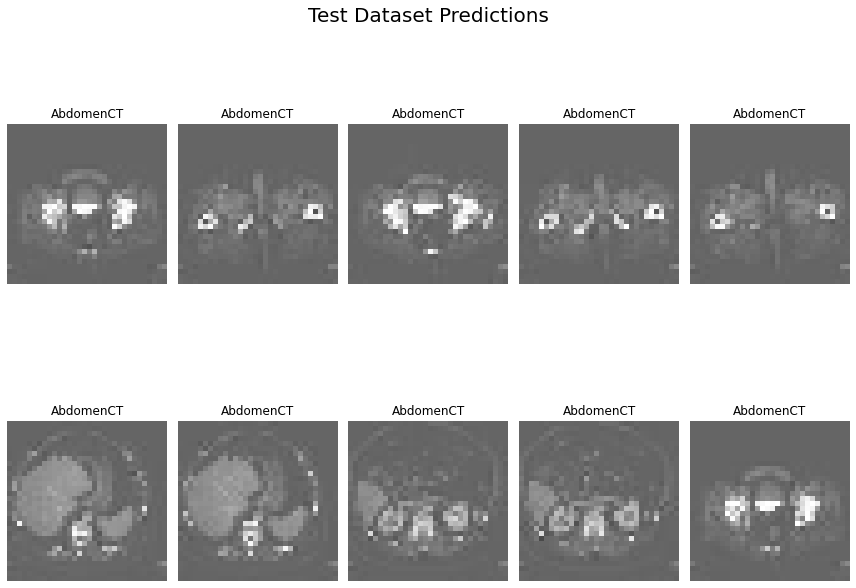

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [33]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

157/157 [==============================] - 3s 17ms/step - loss: 0.0055 - accuracy: 0.9998


In [34]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.005519106052815914
Test Accuracy: 0.9997997879981995


In [37]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

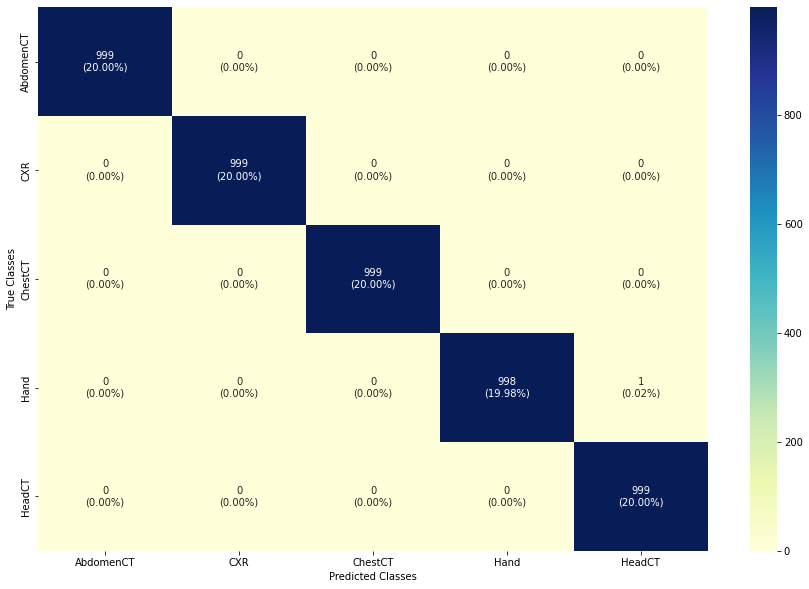

In [38]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(5, 5)

plt.figure(figsize = (15, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()